In [1]:
# Importando os dados do arquivo csv

import pandas as pd

df_tweet = pd.read_csv('Dados/train/Train3classes.csv')

print(df_tweet.shape)

df_tweet.sample(10).head()

(95000, 5)


,id,tweet_text,tweet_date,sentiment,query_used
92543,1047063581479641088,@QueziaRamalho @MarceloFreixo Bem que ele pode...,Tue Oct 02 09:59:45 +0000 2018,0,:(
54014,1049161096102330369,"próxima vez não só o nordeste, mas também o ne...",Mon Oct 08 04:54:32 +0000 2018,0,:(
70646,1050770025307627520,@brztriz ficou lindimais. ai kkkkkkj acho que ...,Fri Oct 12 15:27:51 +0000 2018,1,:)
87239,1037811722638295041,'É inaceitável que atitudes extremadas maculem...,Thu Sep 06 21:16:10 +0000 2018,2,folha
85136,1049316186763276288,"@digavivian To igualzinha, vi :( força pra nós",Mon Oct 08 15:10:48 +0000 2018,0,:(


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# Separando o Dataframe em Dataframe de Treino e de Teste

df_experiment, df_test = train_test_split(df_tweet, test_size=.3)

In [4]:
SUBSET_DUPLICADOS = df_experiment.drop(['tweet_date', 'id'], axis=1).columns.to_list()

num_duplicados = df_experiment.duplicated(subset=SUBSET_DUPLICADOS).sum()

print(f'{num_duplicados} linhas duplicadas em {len(df_experiment)} registros')

443 linhas duplicadas em 66500 registros


In [5]:
df_experiment = df_experiment.drop_duplicates(subset=SUBSET_DUPLICADOS)

print(df_experiment.shape, f'{df_experiment.duplicated(subset=SUBSET_DUPLICADOS).sum()}')

(66057, 5) 0


<AxesSubplot:>

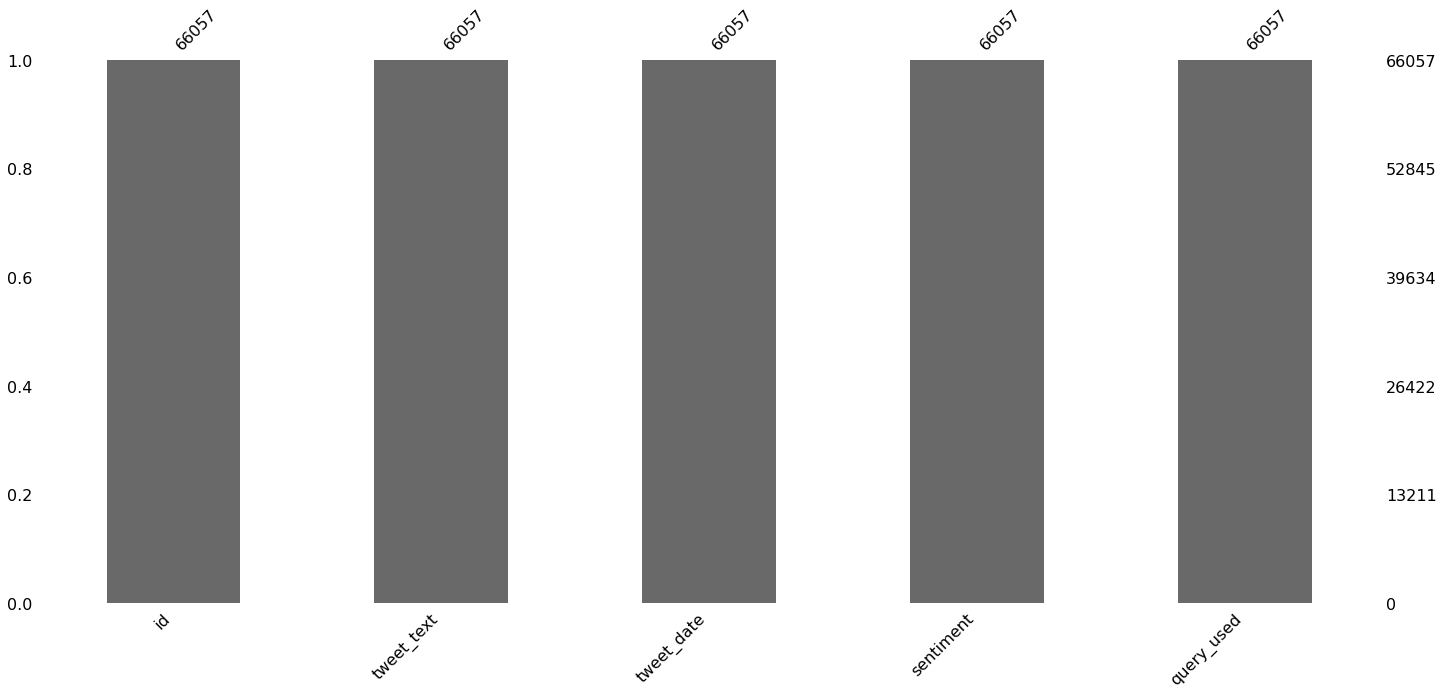

In [6]:
import missingno as msno
msno.bar(df_experiment)

In [7]:
#df_experiment[['tweet_text', 'sentiment']].drop_duplicates()

In [8]:
import re

def clean_https(df):
    text = df['tweet_text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0]);
    
    return text

In [9]:
clean_https(df_experiment)

45931    a cara da wendy de desconforto deve ser péssim...
82237                @estudevictor @gugtavas Opa... obg :D
16382    @JKM940 Ih, bebê. Essa base que eu to é do meu...
6376     @_whoisge HAHAHAHAAHAHA PORRA GE, pior que ta ...
50345    Brasileiro de 2018 está entre os mais equilibr...
                               ...                        
55605    Trump anuncia início de negociações de acordo ...
11100    @ohmyseokie brigada nene :( eu ando bem mal e ...
79017    Empresas valorizam cada vez mais a ocupação de...
81266    @MozonaShawn Uii bruxa Na minha escola não tem...
6322        O Netflix BR vai exibir a série dos Titãs. :) 
Name: tweet_text, Length: 66057, dtype: object

In [10]:
df_experiment.sample(10).head()

,id,tweet_text,tweet_date,sentiment,query_used
31678,1047467157624381440,"caraca ! e o futuro não para ! +3,6% já, 84.90...",Wed Oct 03 12:43:26 +0000 2018,1,:)
92938,1048196335210569728,Bolsonaro lidera entre evangélicos; vantagem e...,Fri Oct 05 13:00:55 +0000 2018,2,veja
52632,1047553552070135811,q vontade de mandar tudo mundo se fuder :),Wed Oct 03 18:26:44 +0000 2018,1,:)
19791,1046794416487378946,Eu não sei se tou triste ou feliz (:(,Mon Oct 01 16:10:12 +0000 2018,0,:(
3783,1044612981424836609,"Após queda de premiê, partido sueco anti-imigr...",Tue Sep 25 15:41:57 +0000 2018,2,exame


In [11]:
df_train, df_valid = train_test_split(df_experiment, test_size=.2)

In [12]:
x_train, y_train = df_train['tweet_text'], df_train['sentiment']
x_valid, y_valid = df_valid['tweet_text'], df_valid['sentiment']

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(52845,) (52845,)
(13212,) (13212,)


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10000)

vectorizer.fit(x_train)

CountVectorizer(max_features=10000)

In [14]:
x_train_transformed = vectorizer.transform(x_train).toarray()

print(x_train_transformed.shape)

x_valid_transformed = vectorizer.transform(x_valid).toarray()

print(x_valid_transformed.shape)

(52845, 10000)
(13212, 10000)


In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
modelo = MultinomialNB()

modelo

MultinomialNB()

In [17]:
# Treino do modelo

modelo.fit(x_train_transformed, y_train)

MultinomialNB()

In [18]:
y_train_pred = modelo.predict(x_train_transformed)

y_valid_pred = modelo.predict(x_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(52845,) (13212,)


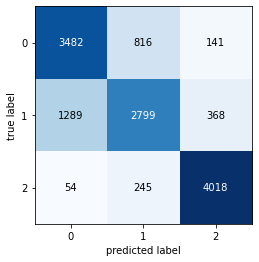

In [19]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred, average='micro')
rec_train = recall_score(y_train, y_train_pred, average='micro')

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred, average='micro')
rec_valid = recall_score(y_valid, y_valid_pred, average='micro')

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.82, Precision: 0.82, Recall: 0.82
Validação:
Acc: 0.78, Precision: 0.78, Recall: 0.78


## Teste

In [21]:
x_test = df_test['tweet_text']
y_test = df_test['sentiment']

print(x_test.shape, y_test.shape)

(28500,) (28500,)


In [22]:
x_test_transformed = vectorizer.transform(x_test).toarray()

print(x_test_transformed.shape)

(28500, 10000)


In [23]:
y_test_pred = modelo.predict(x_test_transformed)

print(y_test_pred.shape)

(28500,)


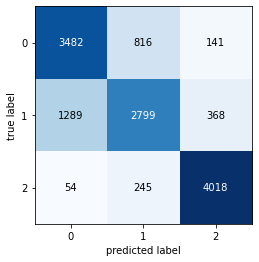

In [24]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred,average='micro')
rec_test = recall_score(y_test, y_test_pred, average='micro')


print(f'Teste:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')

Teste:
Acc: 0.79, Precision: 0.79, Recall: 0.79


## Subm

In [36]:
df_subm = pd.read_csv('Dados/subm/Subm3classes.csv')

print(df_subm.shape)

df_subm.sample(10).head()

(5000, 4)


,id,tweet_text,tweet_date,query_used
2803,1046951938913394693,@GustavOnky ahsuhssuhs não humilho não &gt;:((,Tue Oct 02 02:36:08 +0000 2018,:(
2099,1046947248226152448,queria falar c o douglas mas ao mesmo tempo nã...,Tue Oct 02 02:17:29 +0000 2018,:(
1944,1045241636371009536,CAPA: Voto útil não decola; Ciro e Marina atac...,Thu Sep 27 09:20:00 +0000 2018,estadao
3584,1048400083975385089,"Aqui ditador não se cria, os que brita a gente...",Sat Oct 06 02:30:33 +0000 2018,:)
2989,1046926076629401601,@jhsbisexual mas nao é elee :(,Tue Oct 02 00:53:22 +0000 2018,:(


In [37]:
def sentimento(query):
    if query == ':)':
        return 1
    elif query == ':(':
        return 0
    else:
        return 2

In [38]:
df_subm['sentiment_query'] = df_subm['query_used'].apply(sentimento)

In [39]:
df_subm.sample(10).head()

,id,tweet_text,tweet_date,query_used,sentiment_query
1257,1046946311331823618,Necesito amigos :(( https://t.co/uQFmUEGS6a,Tue Oct 02 02:13:46 +0000 2018,:(,0
966,1042052283939344386,Fabiana Cozza aceita convite para registrar em...,Tue Sep 18 14:06:39 +0000 2018,g1,2
2886,1049279997477879810,@_doidadosgatos que triste amiga :(,Mon Oct 08 12:47:00 +0000 2018,:(,0
2380,1046228808053985280,"to bem triste, essa derrota me deixou muito pr...",Sun Sep 30 02:42:40 +0000 2018,:(,0
784,1046793216182378496,@isadoratejada nao creio isa :((,Mon Oct 01 16:05:25 +0000 2018,:(,0


In [40]:
x_subm = df_subm['tweet_text']
y_subm = df_subm['sentiment_query']

print(x_subm.shape, y_subm.shape)

(5000,) (5000,)


In [41]:
x_subm_transformed = vectorizer.transform(x_subm).toarray()

print(x_subm_transformed.shape)

(5000, 10000)


In [42]:
y_subm_pred = modelo.predict(x_subm_transformed)

print(y_subm_pred.shape)

(5000,)


In [48]:
df_subm['sentiment'] = y_subm_pred

df_subm.sample(10).head()

,id,tweet_text,tweet_date,query_used,sentiment_query,sentiment
4082,1045519522608934912,Feliz comigo mesma. Parei de comer as unhas e ...,Fri Sep 28 03:44:13 +0000 2018,:),1,1
1643,1046997878823182336,no final quem se deu bem foi o rafael ilha: se...,Tue Oct 02 05:38:41 +0000 2018,:(,0,0
945,1038930089860374533,Veja o que é #FATO ou #FAKE na entrevista de E...,Sun Sep 09 23:20:10 +0000 2018,#fato,2,2
2593,1049179776131506176,"@D2ONK EWÇAZSALSJZ só imaginei o ""avoa"", coisi...",Mon Oct 08 06:08:46 +0000 2018,:(,0,0
4173,1046766346019778560,@MrGeniusSwag @BTS_T Obrigada :),Mon Oct 01 14:18:39 +0000 2018,:),1,1


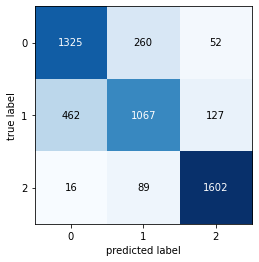

In [52]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_subm, y_subm_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_subm = accuracy_score(y_subm, y_subm_pred)
prec_subm = precision_score(y_subm, y_subm_pred,average='micro')
rec_subm = recall_score(y_subm, y_subm_pred, average='micro')


print(f'Teste:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')

Teste:
Acc: 0.79, Precision: 0.79, Recall: 0.79
